# Covid-19 Outspread Pridiction and EDA

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from statsmodels.tsa.api import Holt
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

### Import Dataset

In [2]:
covid = pd.read_csv('covid_19_data.csv')
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


### Checking Null Values in Dataset

In [3]:
print("Checking the null values in the dataset")
covid.isnull().sum()

Checking the null values in the dataset


SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

### Droping the SNo columns from dataset

In [4]:
print("Droping the SNo columns from dataset.")
covid.drop(["SNo"],1,inplace=True)
covid

Droping the SNo columns from dataset.


,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
18322,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18323,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18324,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0
18325,04/24/2020,Yunnan,Mainland China,2020-04-25 06:31:19,185.0,2.0,180.0


### Converting ObservationDate into Correct format

In [5]:
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])
covid['ObservationDate']

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
18322   2020-04-24
18323   2020-04-24
18324   2020-04-24
18325   2020-04-24
18326   2020-04-24
Name: ObservationDate, Length: 18327, dtype: datetime64[ns]

### Make Grouping according to the date 

In [6]:
datewise = covid.groupby(['ObservationDate']).agg({'Confirmed': 'sum', 'Recovered':'sum','Deaths':'sum'})
datewise

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0
...,...,...,...
2020-04-20,2472259.0,645738.0,169986.0
2020-04-21,2549123.0,679819.0,176583.0
2020-04-22,2623960.0,709694.0,183066.0


### Basic Information w.r.t Date

In [7]:
print('Basic Information')
print('Total number of Confirmed cases around the world',datewise['Confirmed'].iloc[-1])
print('Total number of Recovered cases around the world',datewise['Recovered'].iloc[-1])
print('Total number of Deaths cases around the world',datewise['Deaths'].iloc[-1])
print('Total number of Active cases around the world',datewise['Confirmed'].iloc[-1]-datewise['Recovered'].iloc[-1]-datewise['Deaths'].iloc[-1])
print('Total number of Closed cases around the world',datewise['Recovered'].iloc[-1]+ datewise['Deaths'].iloc[-1])


Basic Information
Total number of Confirmed cases around the world 2811193.0
Total number of Recovered cases around the world 793601.0
Total number of Deaths cases around the world 197159.0
Total number of Active cases around the world 1820433.0
Total number of Closed cases around the world 990760.0


### Visualize the Active cases

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

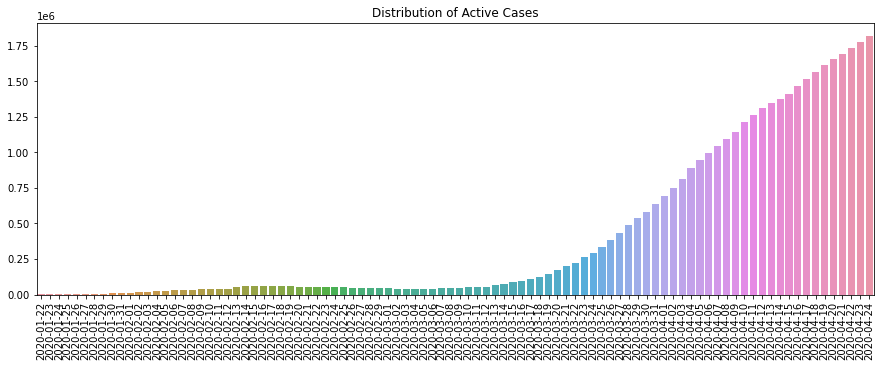

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date, y=datewise['Confirmed']-datewise['Recovered']-datewise['Deaths'])
plt.title("Distribution of Active Cases")
plt.xticks(rotation=90)

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Weekly progress')

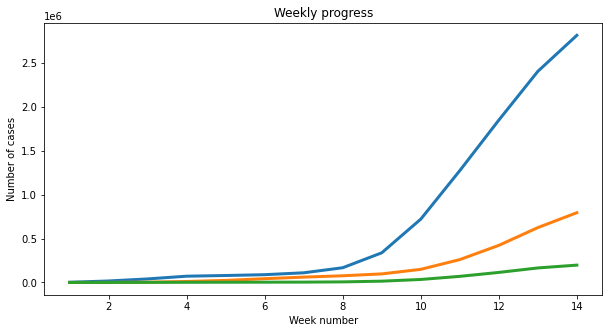

In [9]:
datewise['weekofyear'] = datewise.index.weekofyear
weeknum = []
weekwise_confirmed=[]
weekwise_recovered = []
weekwise_deaths =[]
w=1
for i in list(datewise['weekofyear'].unique()):
    weekwise_confirmed.append(datewise[datewise['weekofyear']==i]['Confirmed'].iloc[-1])
    weekwise_recovered.append(datewise[datewise['weekofyear']==i]['Recovered'].iloc[-1])
    weekwise_deaths.append(datewise[datewise['weekofyear']==i]['Deaths'].iloc[-1])
    weeknum.append(w)
    w=w+1
plt.figure(figsize=(10,5))
plt.plot(weeknum,weekwise_confirmed,linewidth=3)
plt.plot(weeknum,weekwise_recovered,linewidth=3)
plt.plot(weeknum,weekwise_deaths,linewidth=3)
plt.xlabel("Week number")
plt.ylabel("Number of cases")
plt.title("Weekly progress")

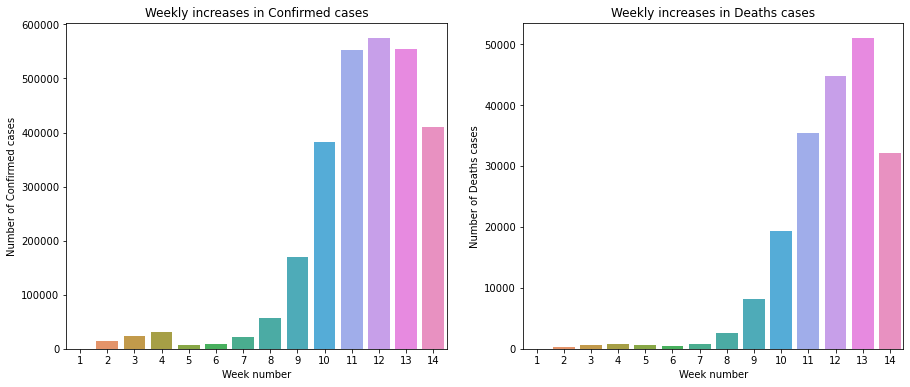

In [10]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
sns.barplot(x=weeknum,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=weeknum,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week number")
ax2.set_xlabel("Week number")
ax1.set_ylabel("Number of Confirmed cases")
ax2.set_ylabel("Number of Deaths cases")
ax1.set_title("Weekly increases in Confirmed cases")
ax2.set_title("Weekly increases in Deaths cases")
plt.show()

The average in number of Confirmed cases daily 29900.0
The average in number of Recovered cases daily 8442.0
The average in number of Deaths cases daily 2097.0


(array([737456., 737470., 737485., 737499., 737516., 737530.]),
 <a list of 6 Text major ticklabel objects>)

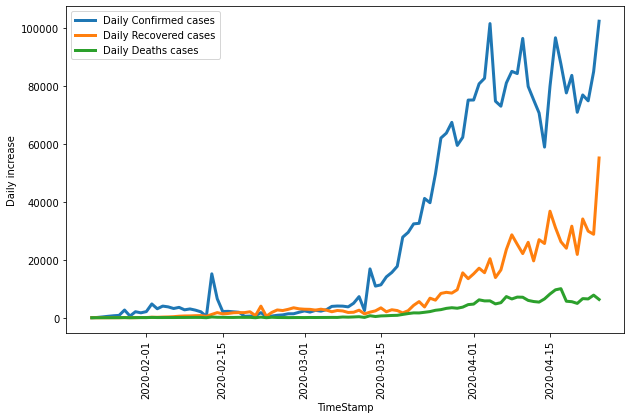

In [11]:
print("The average in number of Confirmed cases daily",np.around(datewise['Confirmed'].diff().fillna(0).mean()))
print("The average in number of Recovered cases daily",np.around(datewise['Recovered'].diff().fillna(0).mean()))
print("The average in number of Deaths cases daily",np.around(datewise['Deaths'].diff().fillna(0).mean()))

plt.figure(figsize=(10,6))
plt.plot(datewise['Confirmed'].diff().fillna(0),label="Daily Confirmed cases" , linewidth=3)
plt.plot(datewise['Recovered'].diff().fillna(0),label="Daily Recovered cases", linewidth=3)
plt.plot(datewise['Deaths'].diff().fillna(0),label="Daily Deaths cases", linewidth=3)
plt.xlabel("TimeStamp")
plt.ylabel("Daily increase")
plt.legend()
plt.xticks(rotation=90)

### Country wise analysis

In [12]:
countrywise = covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(['Country/Region']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'}).sort_values(['Confirmed'],ascending=False)
countrywise['Mortality'] = (countrywise['Deaths']/countrywise['Recovered'])*100
countrywise['Recovered']= (countrywise['Recovered']/countrywise['Confirmed'])*100

Text(0.5, 1.0, 'top 15 countries as per number of deaths cases')

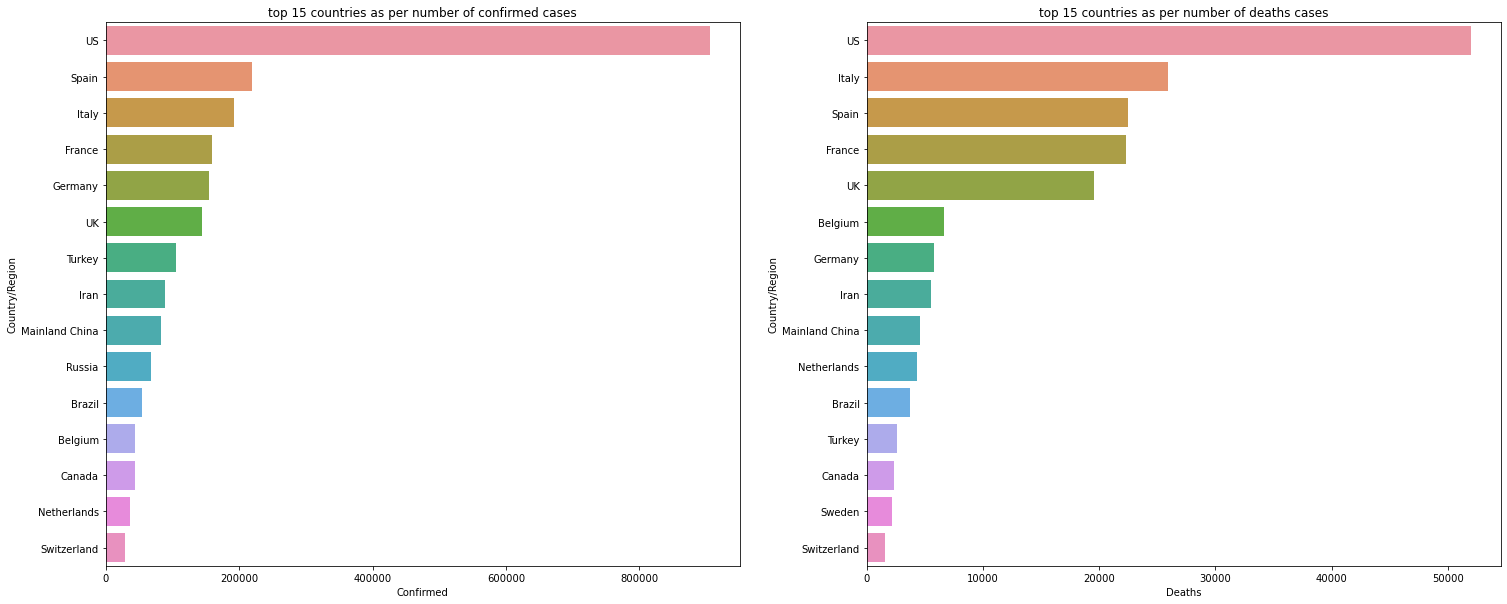

In [14]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,10))
top_15confirmed= countrywise.sort_values(['Confirmed'],ascending=False).head(15)
top_15deaths= countrywise.sort_values(['Deaths'],ascending=False).head(15)
sns.barplot(x=top_15confirmed['Confirmed'], y=top_15confirmed.index,ax=ax1)
ax1.set_title("top 15 countries as per number of confirmed cases")
#deaths case in top 15 countries
sns.barplot(x=top_15deaths['Deaths'], y=top_15deaths.index,ax=ax2)
ax2.set_title("top 15 countries as per number of deaths cases")

### Data Analysis for India

In [15]:
india = covid[covid['Country/Region']=='India']
datewise_ind = india.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
print(datewise_ind.iloc[-1])
print("Total Active cases", datewise_ind['Confirmed'].iloc[-1]-datewise_ind['Recovered'].iloc[-1])
print("Total closed cases", datewise_ind['Recovered'].iloc[-1]+datewise_ind['Deaths'].iloc[-1])

Confirmed    24530.0
Recovered     5498.0
Deaths         780.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active cases 19032.0
Total closed cases 6278.0


### Data Analysis for USA

In [16]:
US = covid[covid['Country/Region']=='US']
datewise_us = US.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
print(datewise_us.iloc[-1])
print("Total Active cases", datewise_us['Confirmed'].iloc[-1]-datewise_us['Recovered'].iloc[-1])
print("Total closed cases", datewise_us['Recovered'].iloc[-1]+datewise_us['Deaths'].iloc[-1])

Confirmed    905333.0
Recovered     99079.0
Deaths        51949.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active cases 806254.0
Total closed cases 151028.0


C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Weekly progress in India')

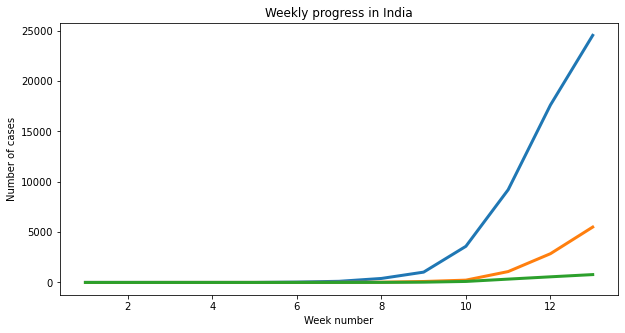

In [17]:
datewise_ind['weekofyear'] = datewise_ind.index.weekofyear
weeknum_ind = []
weekwise_confirmed_ind=[]
weekwise_recovered_ind = []
weekwise_deaths_ind =[]
w=1
for i in list(datewise_ind['weekofyear'].unique()):
    weekwise_confirmed_ind.append(datewise_ind[datewise_ind['weekofyear']==i]['Confirmed'].iloc[-1])
    weekwise_recovered_ind.append(datewise_ind[datewise_ind['weekofyear']==i]['Recovered'].iloc[-1])
    weekwise_deaths_ind.append(datewise_ind[datewise_ind['weekofyear']==i]['Deaths'].iloc[-1])
    weeknum_ind.append(w)
    w=w+1
plt.figure(figsize=(10,5))
plt.plot(weeknum_ind,weekwise_confirmed_ind,linewidth=3)
plt.plot(weeknum_ind,weekwise_recovered_ind,linewidth=3)
plt.plot(weeknum_ind,weekwise_deaths_ind,linewidth=3)
plt.xlabel("Week number")
plt.ylabel("Number of cases")
plt.title("Weekly progress in India")

In [18]:
max_ind = datewise_ind['Confirmed'].max()
china = covid[covid['Country/Region']=='Mainland china']
italy = covid[covid['Country/Region']=='Italy']
US = covid[covid['Country/Region']=='US']
spain = covid[covid['Country/Region']=='Spain']
datewise_china = china.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
datewise_italy = italy.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
datewise_us = US.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
datewise_spain = spain.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})

In [19]:
print("It take", datewise_ind[datewise_ind['Confirmed']>0].shape[0],"days in india to reach",max_ind,"confirmed cases")
print("It take", datewise_italy[(datewise_italy['Confirmed']>0) &(datewise_italy['Confirmed']<=max_ind)].shape[0],"days in italy to reach confirmed cases")
print("It take", datewise_us[(datewise_us['Confirmed']>0) &(datewise_us['Confirmed']<=max_ind)].shape[0],"days in usa to reach confirmed cases")

print("It take", datewise_spain[(datewise_spain['Confirmed']>0) &(datewise_spain['Confirmed']<=max_ind)].shape[0],"days in spain to reach confirmed cases")
print("It take", datewise_china[(datewise_china['Confirmed']>0 )&(datewise_china['Confirmed']<=max_ind)].shape[0],"days in china to reach confirmed cases")

It take 86 days in india to reach 24530.0 confirmed cases
It take 44 days in italy to reach confirmed cases
It take 59 days in usa to reach confirmed cases
It take 49 days in spain to reach confirmed cases
It take 0 days in china to reach confirmed cases


In [20]:
datewise['Days since']= datewise.index-datewise.index[0]
datewise['Days since'] = datewise['Days since'].dt.days
train = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid = datewise.iloc[:int(datewise.shape[0]*0.95):]

train_x, train_y = train['Days since'].values.reshape(-1,1), train['Confirmed'].values.reshape(-1,1)
valid_x, valid_y = valid['Days since'].values.reshape(-1,1), valid['Confirmed'].values.reshape(-1,1)

### Apply GradientBoostingRegressor

In [22]:
xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(train_x, train_y)


XGBRegressor(verbosity=0)

In [23]:
pred_y = xgbr.predict(train_x)
pred_y

array([1.27780457e+03, 1.27780457e+03, 1.27780457e+03, 1.63302625e+03,
       2.28470728e+03, 3.09398022e+03, 5.69225830e+03, 6.31147021e+03,
       8.25180273e+03, 1.01003076e+04, 1.20385850e+04, 1.69196348e+04,
       1.94679824e+04, 2.43403809e+04, 2.78942285e+04, 2.98173633e+04,
       3.39532305e+04, 3.87901836e+04, 3.89820977e+04, 4.33176680e+04,
       4.53782891e+04, 4.53782891e+04, 5.89116758e+04, 6.75170703e+04,
       6.97161641e+04, 7.02601250e+04, 7.43452422e+04, 7.54510312e+04,
       7.56108359e+04, 7.59748984e+04, 7.69689453e+04, 7.85941094e+04,
       7.92106641e+04, 7.93869141e+04, 7.93869141e+04, 8.25204922e+04,
       8.27488438e+04, 8.41403125e+04, 8.41403125e+04, 9.02738672e+04,
       9.02738672e+04, 9.25427969e+04, 9.51856250e+04, 9.51856250e+04,
       1.04667734e+05, 1.05573648e+05, 1.10159242e+05, 1.11391695e+05,
       1.20167781e+05, 1.26261406e+05, 1.28459195e+05, 1.45123141e+05,
       1.56101203e+05, 1.67187469e+05, 1.81261453e+05, 1.97343297e+05,
      

### Training score of XGB

In [24]:
score = xgbr.score(train_x, train_y)  
print("Training score: ", score)

Training score:  0.9999958468281249


### Apply K-Fold on XGB

In [25]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, train_x, train_y, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.99


### prediction of XGB

In [26]:
ypred = xgbr.predict(valid_x)
mse = mean_squared_error(valid_y, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse*(1/2.0)))

MSE: 1909339.39
RMSE: 954669.69


### Visualize the XGB Results

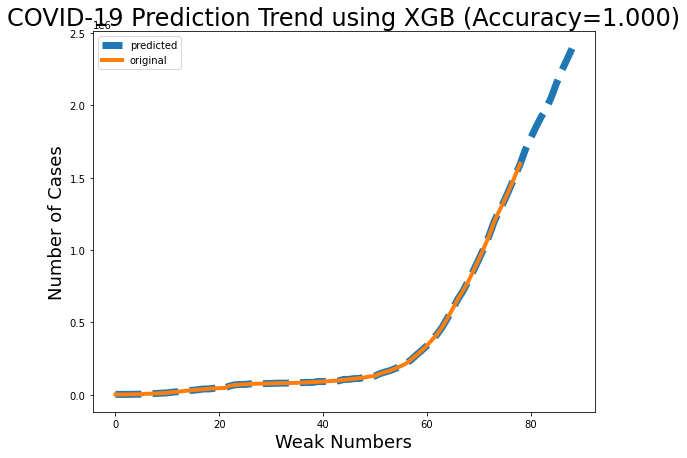

In [34]:
plt.figure(figsize=(9,7))
plt.plot(valid_x, ypred, label="predicted", lw=7, linestyle='--')
plt.plot(valid_x[:-10], valid_y[:-10], lw=4, label="original")
plt.xlabel('Weak Numbers', fontsize=18)
plt.ylabel('Number of Cases', fontsize=18)
plt.title("COVID-19 Prediction Trend using XGB (Accuracy=%.3f)" % (score), fontsize=24)
plt.legend()
plt.show()


### Apply Random forest Regressor


In [28]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100, max_depth=30, random_state=0)
RF.fit(train_x, train_y)

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=30, random_state=0)

In [29]:
y_pred_rf = RF.predict(valid_x)

### Training score of Random forest Regressor

In [30]:
score_rf = RF.score(train_x, train_y)  
print("Training score: ", score_rf)

Training score:  0.999773908402794


### Apply K-Fold

In [31]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores_rf = cross_val_score(RF, train_x, train_y, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores_rf.mean())

C:\Users\pytho\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pytho\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pytho\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pytho\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

K-fold CV average score: 1.00


### Prediction of Random forest

In [32]:
ypred_rf = RF.predict(valid_x)
mse = mean_squared_error(valid_y, ypred_rf)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse*(1/2.0)))

MSE: 103941181.39
RMSE: 51970590.70


### Visualize the Random Forest Results

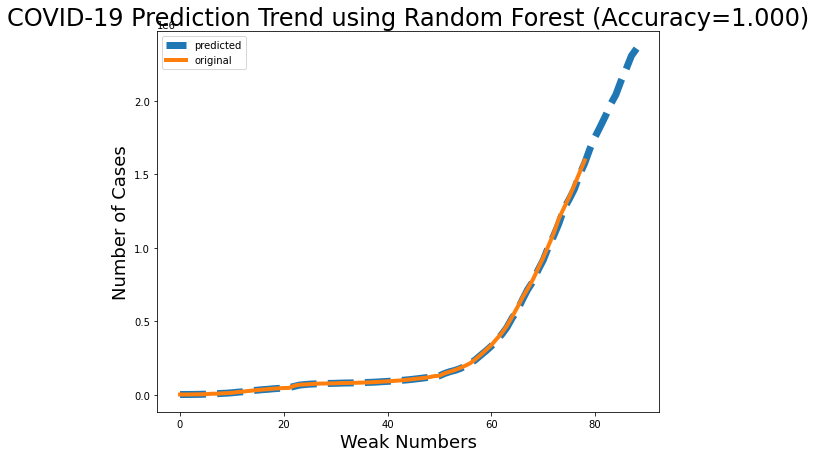

In [33]:
plt.figure(figsize=(9,7))
plt.plot(valid_x, ypred_rf, label="predicted", lw=7, linestyle='--')
plt.plot(valid_x[:-10], valid_y[:-10], lw=4, label="original")
plt.xlabel('Weak Numbers', fontsize=18)
plt.ylabel('Number of Cases', fontsize=18)
plt.title("COVID-19 Prediction Trend using Random Forest (Accuracy=%.3f)" % (score_rf), fontsize=24)
plt.legend()
plt.show()